<a href="https://colab.research.google.com/github/Mhmdaris15/test-score-prediction/blob/main/Predict_test_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
df = pd.read_csv('test_scores.csv')

In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
for i in df.columns:
  print(i)
  print(df[i].unique())
features = ['school', 'school_setting', 'school_type', 'teaching_method', 'n_student', 'gender', 'lunch', 'pretest']

school
['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']
school_setting
['Urban' 'Suburban' 'Rural']
school_type
['Non-public' 'Public']
classroom
['6OL' 'ZNS' '2B1' 'EPS' 'IQN' 'PGK' 'UHU' 'UWK' 'A33' 'EID' 'HUJ' 'PC6'
 '1Q1' 'BFY' 'OMI' 'X6Z' '2AP' 'PW5' 'ROP' 'ST7' 'XXJ' '197' '5LQ' 'JGD'
 'HCB' 'NOR' 'X78' 'YUC' 'ZDT' 'ENO' 'TSA' 'VA6' '18K' 'CXC' 'HKF' 'PBA'
 'U6J' 'W8A' '05H' '98D' 'G2L' 'P2A' 'XZM' '1VD' '21Q' '2BR' '3D0' '5JK'
 'O6A' 'QTU' 'AJ1' 'J8J' 'RA5' '5SZ' '6U9' 'FS3' 'XJ8' '0N7' '3XJ' 'RK7'
 'SUR' 'X2O' 'XZ4' '1SZ' '62L' 'NWZ' 'S98' '08N' '9AW' 'IPU' 'KXB' 'PGH'
 'XXE' '6C1' 'AE1' 'H7S' 'P8I' 'SSP' 'CD8' 'J6X' 'KR1' '341' 'D33' 'DFQ'
 'GYM' 'IEM' '7BL' 'A93' 'TB5' 'YTB' '1UU' '4NN' 'V77' 'CII' 'Q0E' 'QA2'
 'ZBH']
teaching_method
['Standard' 'Experimental']
n_student
[20. 21. 18. 15. 16. 19. 17. 28. 27. 24. 14. 22. 23. 31. 25. 26. 29. 

In [ ]:
for col in df.columns:
  print(df[col].value_counts())

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64
Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64
Public        1582
Non-public     551
Name: school_type, dtype: int64
18K    31
QA2    30
Q0E    30
A93    30
YTB    30
       ..
IQN    15
SSP    15
KR1    15
JGD    14
197    14
Name: classroom, Length: 97, dtype: int64
Standard        1373
Experimental     760
Name: teaching_method, dtype: int64
22.0    264
21.0    231
27.0    189
28.0    168
20.0    160
30.0    150
24.0    144
23.0    138
17.0    136
19.0    133
25.0    125
18.0     72
16.0     64
15.0     45
31.0     31
29.0     29
14.0     28
26.0     26
Name: n_student, dtype: int64
Y5XWB    1
QOXPF    1
GXAG3    1
GC32I    1
R

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [ ]:
print('apakah ada NaN Value?')
df.isna().any().any()

apakah ada NaN Value?


False

In [ ]:
df.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


In [ ]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder()

In [ ]:
X = df[features]

In [ ]:
# X_encode = encod.fit_transform(X.drop(columns=['n_student', 'pretest']))

In [ ]:
def categorical_options(categories):
  cat_option = {}
  for cat in categories:
    options = list(set(df[cat]))
    cat_option[cat] = options
  return cat_option

In [ ]:
categories = ['school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']
print(categorical_options(categories))
print('Number of School :', len(set(df['school'])))

{'school_setting': ['Urban', 'Suburban', 'Rural'], 'school_type': ['Non-public', 'Public'], 'teaching_method': ['Experimental', 'Standard'], 'gender': ['Female', 'Male'], 'lunch': ['Does not qualify', 'Qualifies for reduced/free lunch']}
Number of School : 23


In [ ]:
print('Rata rata Pretest :', np.mean(df['pretest'].values).round(2))
print('Rata rata posttest :', np.mean(df['posttest'].values).round(2))

Rata rata Pretest : 54.96
Rata rata posttest : 67.1


In [ ]:
pre_val = df['pretest'].values
post_val = df['posttest'].values

In [ ]:
print('Banyak siswa yang lulus pretest di atas rata-rata :', sum(pre_val >= np.mean(pre_val)))
print('Banyak siswa yang lulus posttest di atas rata-rata :', sum(post_val >= np.mean(post_val)))

Banyak siswa yang lulus pretest di atas rata-rata : 1126
Banyak siswa yang lulus posttest di atas rata-rata : 1080


In [ ]:
print(pre_val[:3])
print(post_val[:3])


[62. 66. 64.]
[72. 79. 76.]


In [ ]:
pre_af = pre_val.reshape((-1,1))
post_af = post_val.reshape((-1,1))
mix = np.hstack((pre_af, post_af))
avg_mix = np.array([i.mean() for i in mix])
avg_mix

array([67. , 72.5, 70. , ..., 48. , 49.5, 44.5])

In [ ]:
print('Banyak siswa yang rata-rata kedua test nya di atas rata kedua test tersebut :', sum(avg_mix >= np.mean(avg_mix)))

Banyak siswa yang rata-rata kedua test nya di atas rata kedua test tersebut : 1097


In [ ]:
X

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0
...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,Standard,30.0,Female,Does not qualify,39.0
2129,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0
2130,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0
2131,ZOWMK,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0


In [ ]:
df.iloc[df['posttest'].argmax(), :]

school                        IDGFP
school_setting                Urban
school_type              Non-public
classroom                       P2A
teaching_method        Experimental
n_student                        17
student_id                    BYVSP
gender                         Male
lunch              Does not qualify
pretest                          86
posttest                        100
Name: 902, dtype: object

In [ ]:
df[df['posttest'] == df.posttest.max()].index

Int64Index([902, 903, 905, 907, 908, 909, 911, 915], dtype='int64')

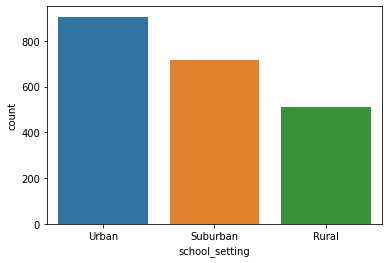

In [ ]:
sns.countplot(x=df['school_setting'])

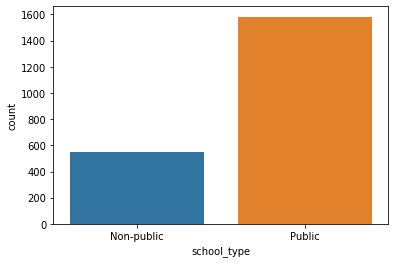

In [ ]:
sns.countplot(x=df['school_type'])

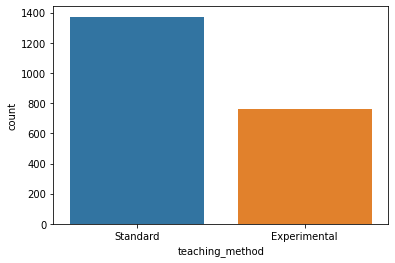

In [ ]:
sns.countplot(x=df['teaching_method'])

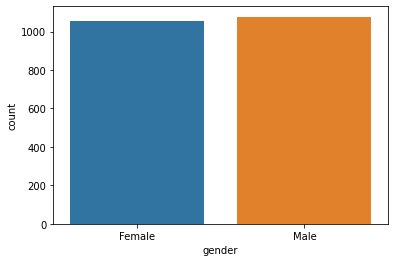

In [ ]:
sns.countplot(x=df['gender'])

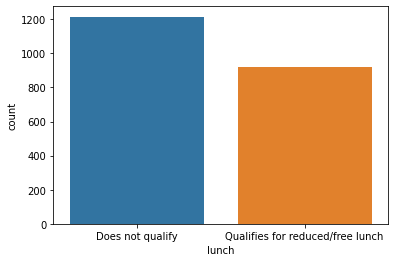

In [ ]:
sns.countplot(x=df['lunch'])

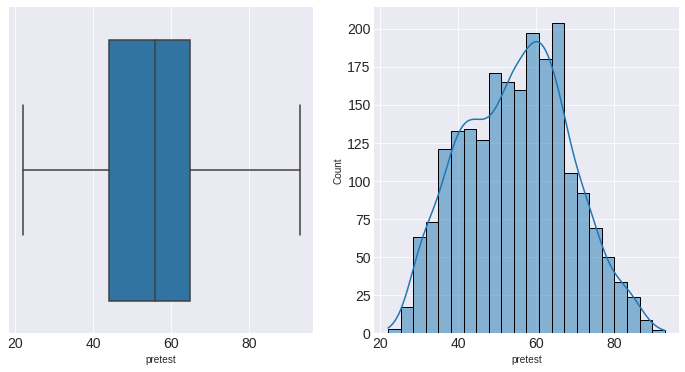

In [ ]:
plt.style.use('seaborn-darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.boxplot(x=df['pretest'], ax=ax1, linewidth=1.5)
sns.histplot(x=df['pretest'], ax=ax2, kde=True)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

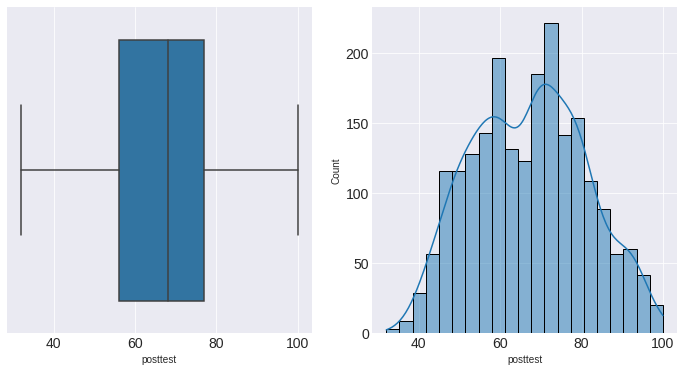

In [ ]:
plt.style.use('seaborn-darkgrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.boxplot(x=df['posttest'], ax=ax1, linewidth=1.5)
sns.histplot(x=df['posttest'], ax=ax2, kde=True)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

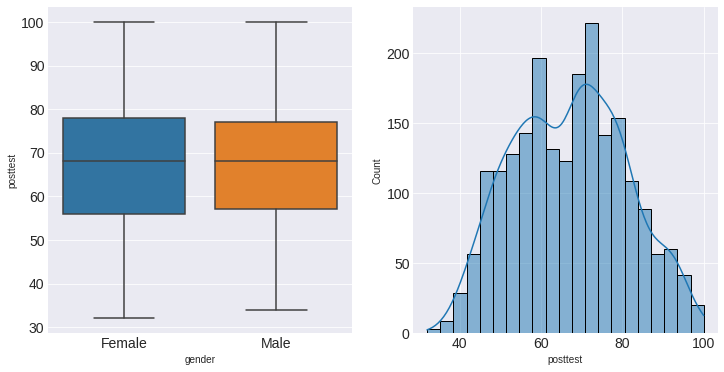

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.boxplot(x=df['gender'], y=df['posttest'], ax=ax1)
sns.histplot(x=df['posttest'], ax=ax2, kde=True)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)


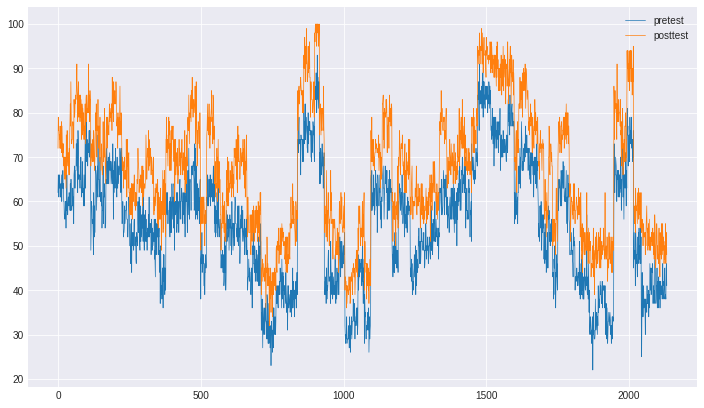

In [ ]:
df[['pretest', 'posttest']].plot(figsize = (12,7), linewidth = 0.7)

(0.0, 9.45)

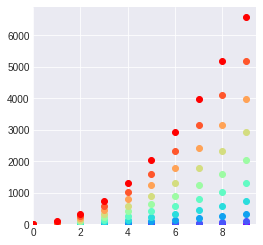

In [ ]:
# Just an experiment
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(4,4))
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    ax.scatter(x, y, color=c)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)


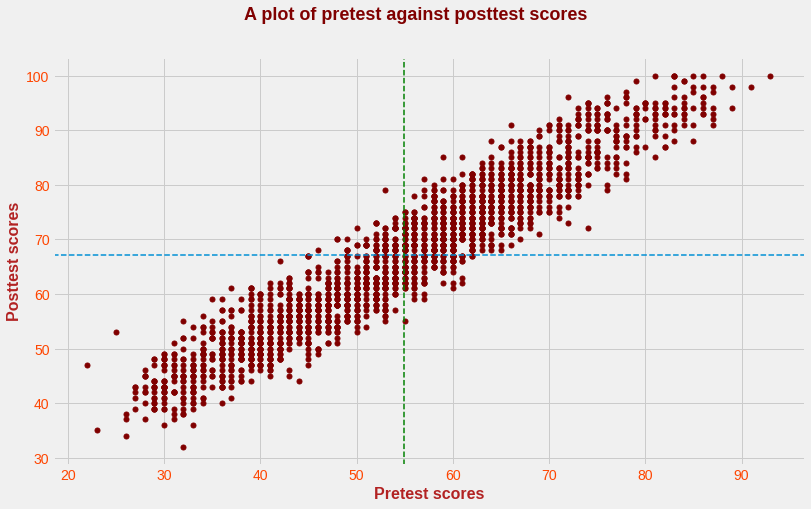

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,7))

ax.plot('pretest', 'posttest', 'o', data=df, color='maroon', markersize=5)

fig.suptitle('A plot of pretest against posttest scores', fontweight='bold', fontsize=18, color='maroon')

ax.set_xlabel('Pretest scores', fontsize=16, fontweight='bold', color='firebrick')
ax.set_ylabel('Posttest scores', fontsize=16, fontweight='bold', color='firebrick')

ax.axhline(df['posttest'].mean(), ls = '--', linewidth = 1.5)
ax.axvline(df['pretest'].mean(), ls = '--', linewidth = 1.5, color = 'green')

ax.tick_params(labelsize=14, labelcolor='orangered')
plt.show()

In [ ]:
# import scipy as sp
import scipy as sp

In [ ]:
# Calculating for spearman's rank correlation among the scores
print(sp.stats.spearmanr(df['pretest'], df['posttest']), end='\n\n')

# Calculating for Pearson's correlation among the scores
pearsonr = sp.stats.pearsonr(df['pretest'], df['posttest'])
print('Pearsonr correlaton =', pearsonr[0], 'P-value =', pearsonr[1])

SpearmanrResult(correlation=0.9524611026478276, pvalue=0.0)

Pearsonr correlaton = 0.9508842857175767 P-value = 0.0


In [ ]:
# H0: The scores are normally distributed
# H1: The scores are not normally distributed

# Test for normality from the posttest scores
sp.stats.shapiro(df.posttest)

(0.9877511858940125, 1.5582422505100446e-12)

In [ ]:
# H0: The scores have equal variances
# H1: The scores do not have equal variances

sp.stats.levene(df.pretest, df.posttest)

LeveneResult(statistic=3.6676091318592823, pvalue=0.055546543831744156)

In [ ]:
df.groupby(['gender'])[['pretest', 'posttest']].mean()
# Grouping the average score based on the gender

,pretest,posttest
gender,,
Female,54.873106,67.004735
Male,55.037140,67.197772


In [ ]:
# Independent Sample T-test between male and female on pre-test scores
male_pretest = df[df.gender == 'Male']['pretest']
fem_pretest = df[df.gender == 'Female']['pretest']

# Test for normality in the male and female pretest scores

# H0: The scores are normally distributed
# H1: The scores are not normally distributed

print('Male_pretest:',sp.stats.shapiro(male_pretest))
print('Female_pretest:',sp.stats.shapiro(fem_pretest))

Male_pretest: (0.9907973408699036, 2.867890316338162e-06)
Female_pretest: (0.986625611782074, 3.0538860329443196e-08)


In [ ]:
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

In [ ]:
X = df.drop(columns=['student_id', 'classroom','posttest'])
y = df['posttest']

In [ ]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categories = ['school', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categories)], remainder='passthrough')

In [ ]:
X_transformed = transformer.fit_transform(X)

In [ ]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y.values, test_size=0.2, random_state=9)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9411896923109052


In [ ]:
from sklearn.model_selection import cross_val_score

val_score = cross_val_score(model, X_transformed, y.values)
print(val_score, np.mean(val_score), sep=' \n')

[0.78745119 0.89778127 0.905511   0.80775769 0.90321514] 
0.860343258808547


In [ ]:
cv_mae = cross_val_score(model, X_transformed, y.values, scoring='neg_mean_absolute_error')
print(cv_mae.mean())
sklearn.metrics.SCORERS.keys()

-3.3296353886689736


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
# Cross-validated mean-squared-error
cv_mse = cross_val_score(model, X_transformed, y, scoring = 'neg_mean_squared_error')
cv_mse.mean()

-18.795424869905297

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluation_metrics(y_true, y_preds):
  '''
    A function to compute and return the evaluation metrics in the form of a dictionary.
  '''
  r2 = r2_score(y_true, y_preds)
  mae = mean_absolute_error(y_true, y_preds)
  mse = mean_squared_error(y_true, y_preds)

  metrics = {'R2 Score' : r2,
             'Mean Absolute Error' : mae.round(2),
             'Mean Squared Error' : mse.round(2)}
  print(f'R2_score: {r2 * 100:.2f}%')
  print(f'MAE: {mae:.2f}')
  print(f'MSE: {mse:.2f}')
  
  return metrics

In [ ]:
X = df.drop(columns=['student_id', 'classroom','posttest'])
y = df['posttest']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categories)], remainder='passthrough')

X_transformed = transformer.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=101, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
baseline =  evaluation_metrics(y_test, y_preds)

R2_score: 94.42%
MAE: 2.63
MSE: 11.21


In [ ]:
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

X = df.drop(columns=['classroom', 'student_id', 'posttest'])
y = df['posttest']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categories)], remainder='passthrough')

X_transformed = transformer.fit_transform(X)

np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(X_transformed, y, test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)

grid = {'n_estimators' : [10,100,200,500,1000,1200],
        'max_depth' : [None, 5,10,20,30],
        'max_features' : ['auto', 'sqrt'],
        'min_samples_split' : [2,4,6],
        'min_samples_leaf' : [1,2,4]}

rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=grid,
                              n_iter=10,
                              cv=5,
                              verbose=2)
rs_model.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=500, min_samples_split=6, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [ ]:
rs_model.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [ ]:
rs_y_preds = rs_model.predict(X_val)

In [ ]:
rs_metrics = evaluation_metrics(y_val, rs_y_preds)

R2_score: 95.16%
MAE: 2.46
MSE: 9.35


In [ ]:
rs_test_preds = rs_model.predict(X_test)

rs_test_metrics = evaluation_metrics(y_test, rs_test_preds)

R2_score: 95.37%
MAE: 2.33
MSE: 9.02
